In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def read_list(path):
    logs = []
    with open(path, "r") as f:
        for line in f:
            logs.append(float(line))
    return logs

dqn_single_device = read_list("single.txt")
dqn_2_device = read_list("mul_2_exp.txt")
dqn_3_device = read_list("mul_3_exp.txt")
dqn_4_device = read_list("mul_4_exp.txt")
dqn_5_device = read_list("mul_5_exp.txt")
dqn_6_device = read_list("mul_6_exp.txt")
dqn_7_device = read_list("./logs/mul_7_exp.txt")
#dqn_8_device = read_list("./logs/mul_8_exp.txt")
dqn_9_device = read_list("./logs/mul_9_exp.txt")
dqn_10_device = read_list("./logs/mul_10_exp.txt")
dqn_11_device = read_list("./logs/mul_11_exp.txt")
dqn_13_device = read_list("./logs/mul_13_exp.txt")

dpg_3_device = read_list("dpg_mul_3_log.txt")

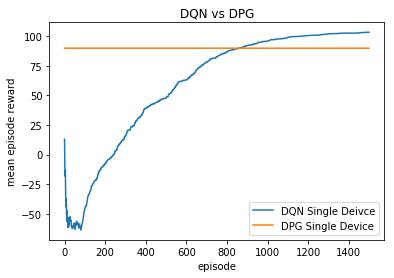

In [40]:
plt.plot(range(len(dqn_single_device)), dqn_single_device, label="DQN Single Deivce")
plt.plot(range(len(dqn_single_device)), [90 for _ in range(1500)], label="DPG Single Device")
plt.title("DQN vs DPG")
plt.xlabel("episode")
plt.ylabel("mean episode reward")
plt.legend()
plt.savefig("Single_device_performance.png")

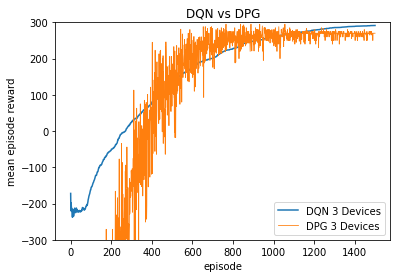

In [41]:
plt.plot(range(len(dqn_3_device)), dqn_3_device, label="DQN 3 Devices")
plt.plot(range(len(dpg_3_device)), dpg_3_device, label="DPG 3 Devices", linewidth=0.8)
plt.ylim((-300,300))
plt.title("DQN vs DPG")
plt.xlabel("episode")
plt.ylabel("mean episode reward")
plt.legend()
plt.savefig("3_Device_Performance.png")

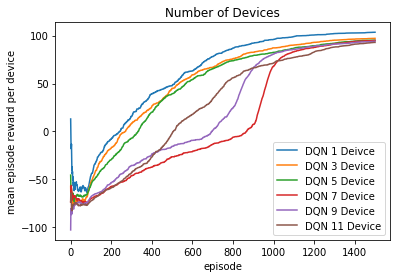

In [42]:
plt.plot(range(len(dqn_single_device)), dqn_single_device, label="DQN 1 Deivce")
plt.plot(range(len(dqn_3_device)), [v/3 for v in dqn_3_device], label="DQN 3 Device")
plt.plot(range(len(dqn_3_device)), [v/5 for v in dqn_5_device], label="DQN 5 Device")
plt.plot(range(len(dqn_3_device)), [v/7 for v in dqn_7_device], label="DQN 7 Device")
plt.plot(range(len(dqn_3_device)), [v/9 for v in dqn_9_device], label="DQN 9 Device")
plt.plot(range(len(dqn_3_device)), [v/11 for v in dqn_11_device], label="DQN 11 Device")
plt.title("Number of Devices")
plt.xlabel("episode")
plt.ylabel("mean episode reward per device")
plt.legend()
plt.savefig("num_device_performance.png")

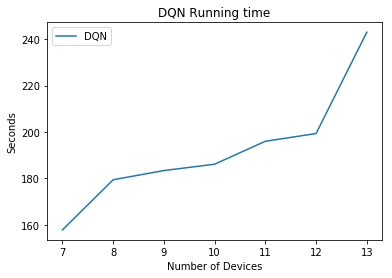

In [7]:
times = []
for i in range(1, 14):
    with open("./logs/dqn_%s_runtime.txt" % i) as f:
        for l in f:
            times.append(float(l))
            break

plt.plot(range(7,14), times[6:14], label="DQN")
plt.title("DQN Running time")
plt.xlabel("Number of Devices")
plt.ylabel("Seconds")
plt.legend()
plt.savefig("time_cost.png")

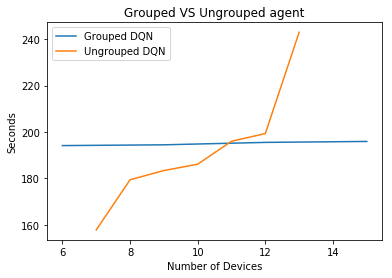

In [19]:
proper_times = [1,2,3,4]

group_times = [times[i] for i in proper_times]

plt.plot([6, 9, 12, 15], group_times, label="Grouped DQN")
plt.plot(range(7,14), times[6:14], label="Ungrouped DQN")
plt.title("Grouped VS Ungrouped agent")
plt.xlabel("Number of Devices")
plt.ylabel("Seconds")
plt.legend()
plt.savefig("groupingvs.png")

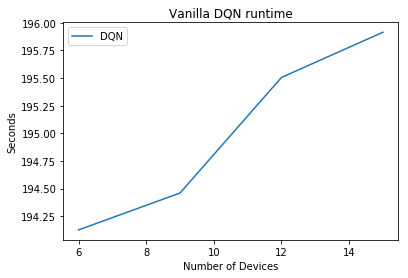

In [24]:
group_times = []

with open("logs/dqn_grouping_times.txt", "r") as f:
    for time in f:
        group_times.append(float(time))

plt.plot([6, 9, 12, 15], group_times, label="DQN")
plt.title("Vanilla DQN runtime")
plt.xlabel("Number of Devices")
plt.ylabel("Seconds")
plt.legend()
plt.savefig("grouping.png")

In [22]:
advise_curve = read_list("./logs/advise_single.txt")
normal_curve = read_list("./logs/normal_single.txt")

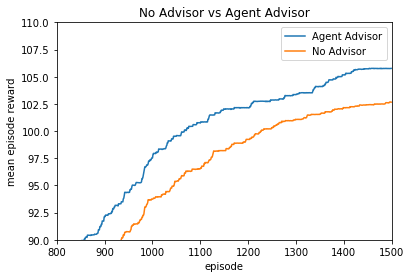

In [23]:
plt.plot(range(1500), advise_curve, label="Agent Advisor")
plt.plot(range(1500), normal_curve, label="No Advisor")
plt.title("No Advisor vs Agent Advisor")
plt.xlabel("episode")
plt.ylabel("mean episode reward")
plt.ylim(90,110)
plt.xlim(800,1500)
plt.legend()
plt.savefig("advisor.png")